# Tuples are immutable

A tuple is a sequence of values. The values can be any type, and they are indexed by integers, so in that respect tuples are a lot like arrays. The important difference is that tuples are immutable.

Syntactically, a tuple is a comma-separated list of values:

In [8]:
t = 'a', 'b', 'c', 'd', 'e'

('a', 'b', 'c', 'd', 'e')

Although it is not necessary, it is common to enclose tuples in parentheses:

In [9]:
t = ('a', 'b', 'c', 'd', 'e')

('a', 'b', 'c', 'd', 'e')

To create a tuple with a single element, you have to include a final comma:

In [10]:
t = ('a',)
typeof(t)

Tuple{Char}

A value in parentheses is not a tuple:

In [11]:
t = ('a')
typeof(t)

Char

Another way to create a tuple is the built-in function `tuple`. With no argument, it creates an empty tuple:

In [16]:
t = tuple()

()

If multiple arguments are provided, the result is a tuple with the given arguments:

In [18]:
t = tuple(1, 'a', pi)

(1, 'a', π = 3.1415926535897...)

Most array operators also work on tuples. The bracket operator indexes an element:

In [27]:
t = ('a', 'b', 'c', 'd', 'e')
t[1]

'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)

And the slice operator selects a range of elements:

In [20]:
t[2:3]

('b', 'c')

But if you try to modify one of the elements of the tuple, you get an error:

In [21]:
t[1] = 'A'

LoadError: [91mMethodError: no method matching setindex!(::NTuple{5,Char}, ::Char, ::Int64)[39m

Because tuples are immutable, you can’t modify the elements.

The relational operators work with tuples and other sequences; Julia starts by comparing the first element from each sequence. If they are equal, it goes on to the next elements, and so on, until it finds elements that differ. Subsequent elements are not considered (even if they are really big).

In [29]:
(0, 1, 2000000) < (0, 3, 4)

true

# Tuple assignment

It is often useful to swap the values of two variables. With conventional assignments, you have to use a temporary variable. For example, to swap a and b:
```julia
temp = a
a = b
b = temp
```
This solution is cumbersome; tuple assignment is more elegant:
```julia
a, b = b, a
```
The left side is a tuple of variables; the right side is a tuple of expressions. Each value is assigned to its respective variable. All the expressions on the right side are evaluated before any of the assignments.

# Tuples as return values

Strictly speaking, a function can only return one value, but if the value is a tuple, the effect is the same as returning multiple values. For example, if you want to divide two integers and compute the quotient and remainder, it is inefficient to compute `x÷y` and then `x%y`. It is better to compute them both at the same time.

The built-in function `divrem` takes two arguments and returns a tuple of two values, the quotient and remainder. You can store the result as a tuple:

In [44]:
t = divrem(7, 3)

(2, 1)

Or use tuple assignment to store the elements separately:

In [46]:
quot, rem = divrem(7, 3)
println(quot)
println(rem)

2
1


Here is an example of a function that returns a tuple:

In [1]:
function min_max(t)
    minimum(t), maximum(t)
end

min_max (generic function with 1 method)

`max` and `min` are built-in functions that find the largest and smallest elements of a sequence. `min_max` computes both and returns a tuple of two values.

# Variable-length argument tuples

Functions can take a variable number of arguments. A parameter name that end with `...` gathers arguments into a tuple. For example, printall takes any number of arguments and prints them:

In [47]:
function printall(args...)
    println(args)
end

printall (generic function with 1 method)

The gather parameter can have any name you like, but args is conventional. Here’s how the function works:

In [48]:
printall(1, 2.0, '3')

(1, 2.0, '3')


The complement of gather is scatter. If you have a sequence of values and you want to pass it to a function as multiple arguments, you can use the `...` operator. For example, `divrem` takes exactly two arguments; it doesn’t work with a tuple:

In [49]:
t = (7, 3)
divrem(t)

LoadError: [91mMethodError: no method matching divrem(::Tuple{Int64,Int64})[0m
Closest candidates are:
  divrem(::T, [91m::Base.MultiplicativeInverses.MultiplicativeInverse{T}[39m) where T at multinverses.jl:152
  divrem(::Any, [91m::Any[39m) at number.jl:64
  divrem([91m::BigInt[39m, [91m::BigInt[39m) at gmp.jl:424[39m

But if you scatter the tuple, it works:

In [50]:
divrem(t...)

(2, 1)

Many of the built-in functions use variable-length argument tuples. For example, `max` and `min` can take any number of arguments:

In [51]:
max(1, 2, 3)

3

But `sum` does not:

In [52]:
sum(1, 2, 3)

LoadError: [91mMethodError: no method matching sum(::Int64, ::Int64, ::Int64)[0m
Closest candidates are:
  sum([91m::Union{Function, Type}[39m, ::Any) at reduce.jl:347
  sum([91m::BitArray[39m, ::Any) at bitarray.jl:1827
  sum([91m::Function[39m, [91m::AbstractArray[39m, ::Any) at reducedim.jl:583
  ...[39m

# Arrays and tuples

`zip` is a built-in function that takes two or more sequences and returns an array of tuples where each tuple contains one element from each sequence. The name of the function refers to a zipper, which joins and interleaves two rows of teeth.

This example zips a string and an array:

In [72]:
s = "abc"
t = [1, 2, 3]
zip(s, t)

Base.Iterators.Zip2{String,Array{Int64,1}}("abc", [1, 2, 3])

The result is a `Zip2` object that knows how to iterate through the pairs. The most common use of `zip` is in a `for` loop:

In [54]:
for pair in zip(s, t)
    println(pair)
end

('a', 0)
('b', 1)
('c', 2)


A zip object is a kind of *iterator*, which is any object that iterates through a sequence. Iterators are similar to arrays in some ways, but unlike arrays, you can’t use an index to select an element from an iterator.

If you want to use array operators and functions, you can use a zip object to make an array:

In [55]:
collect(zip(s, t))

3-element Array{Tuple{Char,Int64},1}:
 ('a', 0)
 ('b', 1)
 ('c', 2)

The result is an array of tuples; in this example, each tuple contains a character from the string and the corresponding element from the array.

If the sequences are not the same length, the result has the length of the shorter one.

In [56]:
collect(zip("Anne", "Elk"))

3-element Array{Tuple{Char,Char},1}:
 ('A', 'E')
 ('n', 'l')
 ('n', 'k')

You can use tuple assignment in a `for` loop to traverse an array of tuples:

In [71]:
t = [('a', 1), ('b', 2), ('c', 3)]
for (letter, number) in t
    println(number, " ", letter)
end

1 a
2 b
3 c


Each time through the loop, Julia selects the next tuple in the array and assigns the elements to letter and number. The parentheses around `letter, number)` are compulsory.

If you combine `zip`, `for` and tuple assignment, you get a useful idiom for traversing two (or more) sequences at the same time. For example, has_match takes two sequences, `t1` and `t2`, and returns `true` if there is an index `i` such that `t1[i] == t2[i]`:

In [62]:
function has_match(t1, t2)
    for (x, y) in zip(t1, t2)
        if x == y
            return true
        end
    end
    false
end
has_match("Hello", "World")

true

If you need to traverse the elements of a sequence and their indices, you can use the built-in function `enumerate`:

In [63]:
for (index, element) in enumerate("abc")
    println(index, " ", element)
end

1 a
2 b
3 c


The result from `enumerate` is an enumerate object, which iterates a sequence of pairs; each pair contains an index (starting from 1) and an element from the given sequence.

# Dictionaries and tuples

Dictionaries can be used as iterators that iterates the key-value pairs. You can use it in a `for` loop like this:

In [70]:
d = Dict('a'=>1, 'b'=>2, 'c'=>3)
for (key, value) in d
    println(key, " ", value)
end

b 2
a 1
c 3


As you should expect from a dictionary, the items are in no particular order.

Going in the other direction, you can use an array of tuples to initialize a new dictionary:

In [69]:
t = [('a', 1), ('c', 3), ('b', 2)]
d = Dict(t)

Dict{Char,Int64} with 3 entries:
  'b' => 2
  'a' => 1
  'c' => 3

Combining `Dict` with `zip` yields a concise way to create a dictionary:

In [68]:
d = Dict(zip("abc", 1:3))

Dict{Char,Int64} with 3 entries:
  'b' => 2
  'a' => 1
  'c' => 3

It is common to use tuples as keys in dictionaries. For example, a telephone directory might map from last-name, first-name pairs to telephone numbers. Assuming that we have defined last, first and number, we could write:

In [85]:
last = "Caesar"
first = "Julius"
number = "0032020000000"
directory = Dict()
directory[last, first] = number
directory

Dict{Any,Any} with 1 entry:
  ("Caesar", "Julius") => "0032020000000"

The expression in brackets is a tuple. We could use tuple assignment to traverse this dictionary.

In [78]:
for ((last, first), number) in directory
    println(first, " ", last, " ", number)
end

Julius Caesar 003202000000


This loop traverses the key-value pairs in directory, which are tuples. It assigns the elements of the key in each tuple to last and first, and the value to number, then prints the name and corresponding telephone number.

There are two ways to represent tuples in a state diagram. The more detailed version shows the indices and elements just as they appear in an array.

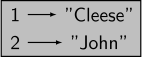

In [84]:
using TikzPictures
TikzPicture(L"""
    \node(hist) [draw, fill=lightgray, minimum width=2.5cm, minimum height=1cm]{};
    \node(nc) at(-1,0.25) {1};
    \node(c) at(0.5,0.25) {"Cleese"};
    \draw[-latex](nc)--(c);
    \node(nj) at(-1,-0.25) {2};
    \node(j) at(0.5,-0.25) {"John"};
    \draw[-latex](nj)--(j);
"""; options="very thick, scale=2, transform shape", preamble="""
    \\usepackage{newtxmath}
    \\renewcommand{\\familydefault}{\\sfdefault}
    \\usepackage{cancel}
""")

But in a larger diagram you might want to leave out the details.

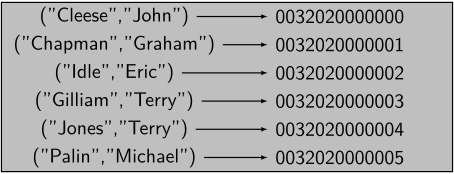

In [101]:
using TikzPictures
TikzPicture(L"""
    \node(hist) [draw, fill=lightgray, minimum width=8cm, minimum height=3cm]{};
    \node(nc) at(-2,1.25) {("Cleese","John")};
    \node(c) at(2,1.25) {0032020000000};
    \draw[-latex](nc)--(c);
    \node(ng) at(-2,0.75) {("Chapman","Graham")};
    \node(g) at(2,0.75) {0032020000001};
    \draw[-latex](ng)--(g);
    \node(ni) at(-2,0.25) {("Idle","Eric")};
    \node(i) at(2,0.25) {0032020000002};
    \draw[-latex](ni)--(i);
    \node(nt) at(-2,-0.25) {("Gilliam","Terry")};
    \node(t) at(2,-0.25) {0032020000003};
    \draw[-latex](nt)--(t);
    \node(nj) at(-2,-0.75) {("Jones","Terry")};
    \node(j) at(2,-0.75) {0032020000004};
    \draw[-latex](nj)--(j);
    \node(np) at(-2,-1.25) {("Palin","Michael")};
    \node(p) at(2,-1.25) {0032020000005};
    \draw[-latex](np)--(p);
"""; options="very thick, scale=2, transform shape", preamble="""
    \\usepackage{newtxmath}
    \\renewcommand{\\familydefault}{\\sfdefault}
    \\usepackage{cancel}
""")

Here the tuples are shown using Julia syntax as a graphical shorthand.

# Sequences of sequences

I have focused on arrays of tuples, but almost all of the examples in this chapter also work with arrays of arrays, tuples of tuples, and tuples of arrays. To avoid enumerating the possible combinations, it is sometimes easier to talk about sequences of sequences.

In many contexts, the different kinds of sequences (strings, arrays and tuples) can be used interchangeably. So how should you choose one over the others?

To start with the obvious, strings are more limited than other sequences because the elements have to be characters. They are also immutable. If you need the ability to change the characters in a string (as opposed to creating a new string), you might want to use an array of characters instead.

Arrays are more common than tuples, mostly because they are mutable. But there are a few cases where you might prefer tuples:

- In some contexts, like a return statement, it is syntactically simpler to create a tuple than an array.

- If you want to use a sequence as a dictionary key, you have to use an immutable type like a `Tuple` or `String`.

- If you are passing a sequence as an argument to a function, using tuples reduces the potential for unexpected behavior due to aliasing.

Because tuples are immutable, they don’t provide function like `sort!` and `reverse!`, which modify existing arrays. But Julia provides the built-in function `sort`, which takes an array and returns a new array with the same elements in sorted order, and `reverse`, which takes any sequence and returns a sequence of the same type in reverse order.

# Debugging

Arrays, dictionaries and tuples are examples of data structures; in this lecture we are starting to see compound data structures, like arrays of tuples, or dictionaries that contain tuples as keys and arrays as values. Compound data structures are useful, but they are prone to what I call *shape errors*; that is, errors caused when a data structure has the wrong type, size, or structure. For example, if you are expecting an array with one integer and I give you a plain old integer (not in an array), it won’t work.